In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Check the total number of tweets for each day, overlay with bitcoin closing price

In [2]:
#load bitcoin pricing information
price = pd.read_csv('../data/external/BTC_USD_2020-10-10_2021-10-09-CoinDesk.csv')
btcpdata = price[['Date', 'Closing Price (USD)']]

In [3]:
#load gold pricing information
price = pd.read_csv('../data/external/PAXG_USD_2020-11-11_2021-10-16-CoinDesk.csv')
goldpdata = price[['Date', 'Closing Price (USD)']]

In [6]:
#merge two dfs by date


merged_df1 = pd.merge(left=goldpdata, right=btcpdata, left_on='Date', right_on='Date')
merged_df1 = merged_df1.rename(columns={'Closing Price (USD)_x': 'Gold (USD)', 'Closing Price (USD)_y': 'Bitcoin (USD)'})
merged_df1 = merged_df1.astype({"Gold (USD)": "int",
                                "Bitcoin (USD)": "int"}) 
merged_df1

,Date,Gold (USD),Bitcoin (USD)
0,2020-11-11,1878,15820
1,2020-11-12,1891,16253
2,2020-11-13,1897,16347
3,2020-11-14,1902,15991
4,2020-11-15,1897,15918
...,...,...,...
328,2021-10-05,1763,51459
329,2021-10-06,1765,55029
330,2021-10-07,1761,53770
331,2021-10-08,1762,54203


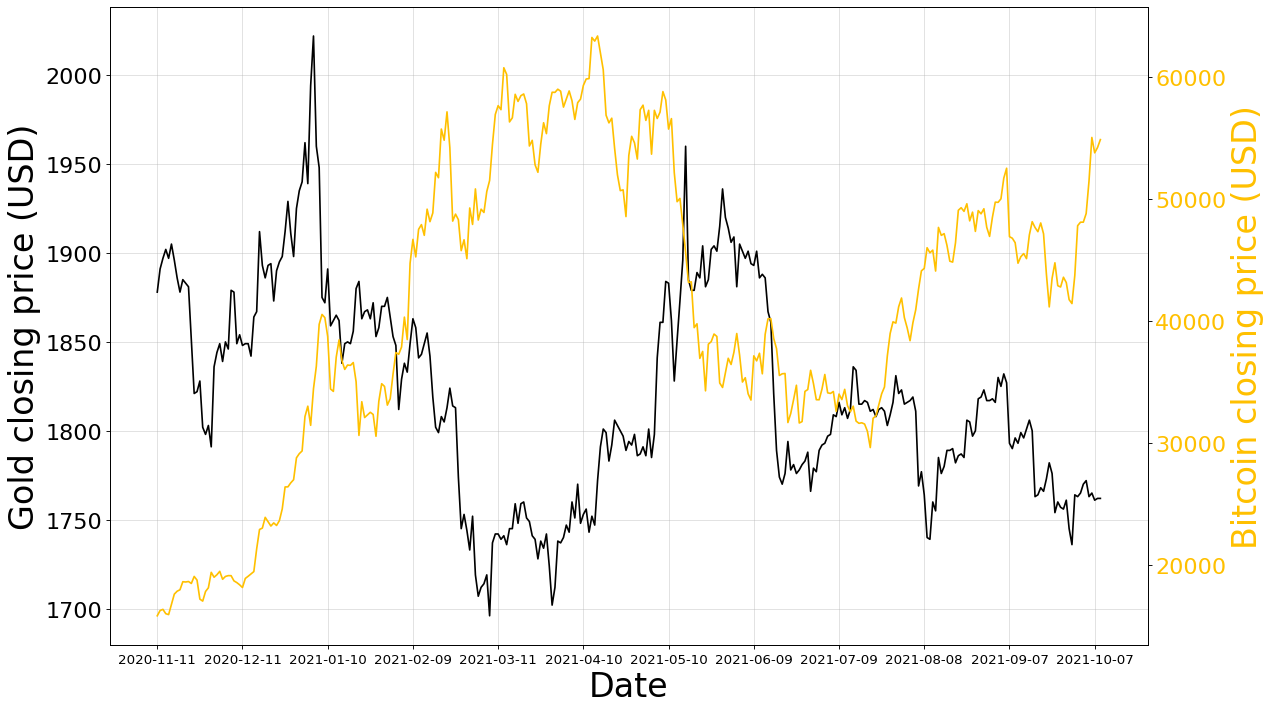

In [23]:
x = merged_df1['Date']
y1 = merged_df1['Gold (USD)']
y2 = merged_df1['Bitcoin (USD)']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='#000000')


# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='#FFC000')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Date', fontsize=30)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Gold closing price (USD)', color='#000000', fontsize=30)
ax1.tick_params(axis='y', rotation=0, labelcolor='#000000', labelsize=20 )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("Bitcoin closing price (USD)", color='#FFC000', fontsize=30)
ax2.tick_params(axis='y', labelcolor='#FFC000', labelsize=20)
ax2.set_xticks(np.arange(0, len(x), 30)) #change this number to change the number of labels
ax2.set_xticklabels(x[::30], rotation=90, fontdict={'fontsize':10}) #change this number to change the number of labels
#ax2.set_title("Personal Savings Rate vs Unemployed: Plotting in Secondary Y Axis", fontsize=22)
fig.tight_layout()
plt.show()




Randomly select rows from each day

In [29]:
#btcdata.groupby(btcdata['date_time'].dt.year).apply(lambda x :x.iloc[random.choice(range(0,len(x)))])
#btcdata.groupby(btcdata['date_time'].dt.year).apply(lambda x: x.sample(2)).reset_index(drop=True)

selected = data.groupby(data['dateTime'].dt.day).apply(lambda x: x.sample(10, random_state=889))

selected.to_csv('sample_bitcoin_tweets_ten_each_day.csv')
selected

id                       date  \
dateTime                                                           
1        877320   1432982797438889985  2021-09-01 08:24:57+00:00   
         1620664  1421887791797919744  2021-08-01 17:37:21+00:00   
         863024   1433146446728024065  2021-09-01 19:15:14+00:00   
         872346   1433054222388396055  2021-09-01 13:08:46+00:00   
         877074   1432987140791672835  2021-09-01 08:42:12+00:00   
...                               ...                        ...   
31       1652708  1421357858134822913  2021-07-31 06:31:35+00:00   
         1655000  1421310741588496386  2021-07-31 03:24:22+00:00   
         898887   1432663044157489159  2021-08-31 11:14:21+00:00   
         1654542  1421318263133310983  2021-07-31 03:54:15+00:00   
         886224   1432819299429888005  2021-08-31 21:35:16+00:00   

                                                               text  \
dateTime                                                              
1        877320   keep putting money into your pension, everythi...   
         1620664  the divine line “bitcoin/cryptocurrency is for...   
         863024                                          shop &amp;   
         872346              gm fam. breaking $50k today. 👊 send it   
         877074   delegates from el salvador's finance commissio...   
...                                                             ...   
31       1652708  imagine if everyone in bitcoin and the larger ...   
         1655000                             full send!!! 💚🚀💥👻🔥✈️✈️   
         898887   $eth flips $btc on its next run up and i don’t...   
         1654542  join me at bitcoin: macroeconomics, geopolitic...   
         886224   when you say "a bitcoin model" you mean they u...   

                                                           hashtags  \
dateTime                                                              
1        877320                          ['Bitcoin', 'FoxBusiness']   
         1620664  ['crypto', 'btc', 'bitcoin', 'bnb', 'bsc', 'cr...   
         863024   ['linkedin', 'twitter', 'facebook', 'instagram...   
         872346                                         ['bitcoin']   
         877074                           ['Bitcoin', 'ElSalvador']   
...                                                             ...   
31       1652708                                                NaN   
         1655000                                                NaN   
         898887                                                 NaN   
         1654542                                                NaN   
         886224                                                 NaN   

                  replyCount  retweetCount  likeCount         userName  \
dateTime                                                                 
1        877320          0.0           0.0        1.0  Alberto62316949   
         1620664         0.0           0.0        1.0     Bbcryptonews   
         863024          0.0           1.0        0.0  bmurphypointman   
         872346         12.0           6.0      127.0       kailybuemi   
         877074          0.0           0.0        2.0  CryptoManiacs10   
...                      ...           ...        ...              ...   
31       1652708         5.0           2.0       36.0         austorms   
         1655000         0.0           0.0        1.0  WatchingCryptYo   
         898887          0.0           5.0       26.0         notEezzy   
         1654542         0.0           0.0        1.0     Bitcoindad88   
         886224          0.0           0.0       10.0          GSR6669   

                  userFollowerCount  userFavCount  userFriendCount  \
dateTime                                                             
1        877320                55.0         819.0            225.0   
         1620664              563.0         422.0           1357.0   
         863024             71127.0          24.0          